# Satellite Image Processing - GDAL Tutorials
##  Bayanat.ai

MUHAMMED SIRAJUL HUDA K



GDAL
- GDAL stands for Geospatial Data Abstraction Library.
- It's an open-source library for reading and writing raster and vector geospatial data formats.
- Developed by Frank Warmerdam and maintained by OSGeo.
- Provides APIs for accessing various GIS data formats.
- Offers command-line utilities for efficient geospatial data processing tasks.
- Capabilities include format conversion, projection transformation, data manipulation, georeferencing, and more.



1. **gdalinfo**: This command is used to retrieve information about a raster dataset. It provides detailed metadata such as the dimensions, coordinate system, pixel size, projection, data type, and georeferencing information. Running `gdalinfo filename.tif` in the terminal would display this information for the specified raster file.

2. **gdal_translate**: This utility is used for raster data format conversion and transformation. It enables users to convert raster data between different formats, as well as perform operations like subsetting, resampling, and reprojecting. For example, `gdal_translate -of JPEG input.tif output.jpg` converts a GeoTIFF file to a JPEG image.

3. **gdalwarp**: This command is used for georeferencing and reprojection of raster datasets. It allows users to change the projection, resolution, and extent of raster data. For instance, `gdalwarp -t_srs EPSG:4326 input.tif output_reprojected.tif` reprojects a raster file to the WGS84 coordinate system.

4. **gdal_merge**: This utility is used to merge multiple raster datasets into a single image. It's particularly useful for creating mosaics or composite images from multiple source files. Running `gdal_merge.py -o output.tif input1.tif input2.tif` merges two input raster files into a single output file.

5. **gdal_calc**: This command allows users to perform raster calculations and mathematical operations on raster datasets. It supports basic arithmetic operations, logical operations, and conditional statements. For example, `gdal_calc.py -A input1.tif -B input2.tif --outfile=result.tif --calc="A+B"` adds two input raster files pixel-wise and saves the result to a new file.

6. **gdalbuildvrt**: This utility is used to build Virtual Raster (VRT) files, which are XML files that reference multiple raster datasets without actually merging them into a single file. VRT files provide a convenient way to work with large collections of raster data. For example, `gdalbuildvrt mosaic.vrt *.tif` creates a VRT file called mosaic.vrt that references all TIFF files in the current directory.

7. **gdal_polygonize**: This command converts raster datasets into vector polygon features. It creates vector polygons representing areas of non-zero pixel values in the input raster. For instance, `gdal_polygonize.py input.tif -f "ESRI Shapefile" output.shp` converts a raster file into a shapefile containing vector polygons.

8. **gdal_contour**: This utility generates contour lines from raster elevation data. It creates vector contour lines at specified intervals based on the elevation values in the input raster dataset. For example, `gdal_contour -a elev input.tif contours.shp` creates contour lines at regular intervals with elevation attribute values stored in the output shapefile.

9. **gdal_rasterize**: This command converts vector features into raster datasets. It allows users to burn vector geometries (points, lines, or polygons) into a raster dataset, assigning pixel values based on attribute values or geometry properties. For example, `gdal_rasterize -a attribute_name input.shp output.tif` rasterizes a shapefile using a specified attribute for pixel values.

10. **gdal_edit**: This utility allows users to edit metadata and georeferencing information of raster datasets. It provides options to modify dataset metadata, projection information, and geotransform parameters. For example, `gdal_edit -a_srs EPSG:4326 input.tif` sets the spatial reference system of a raster file to WGS84.



## Setup and Data Download
 - apt-get install gdal-bin
 - Use anaconda (Recommended) 

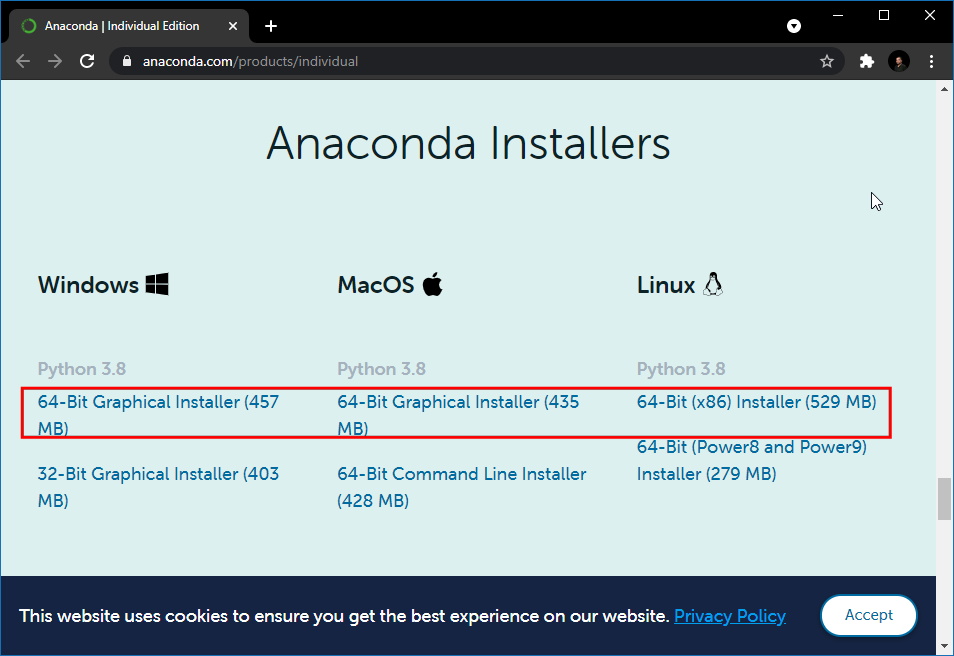 

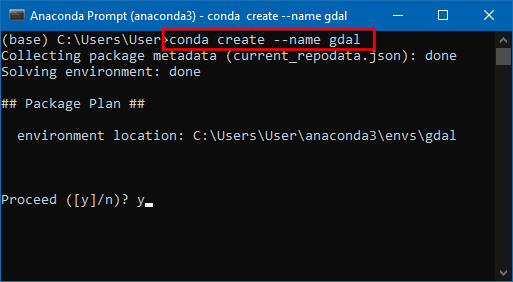

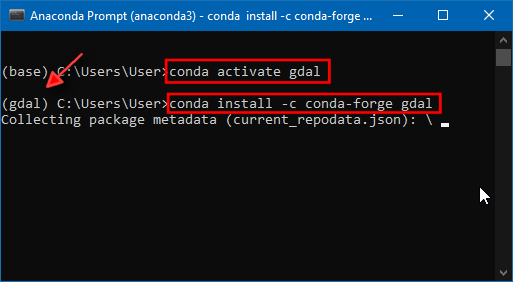

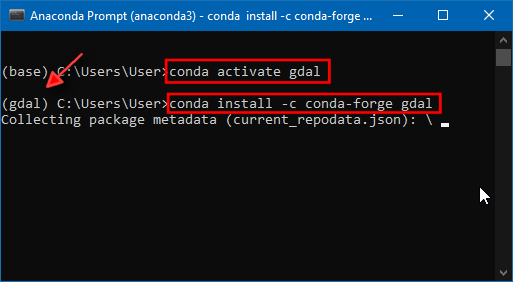

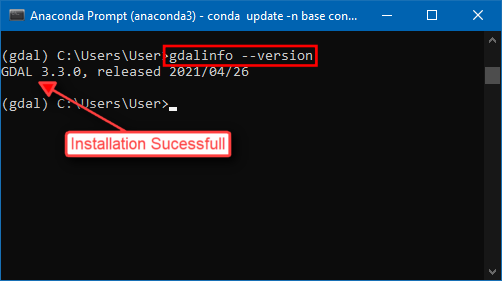

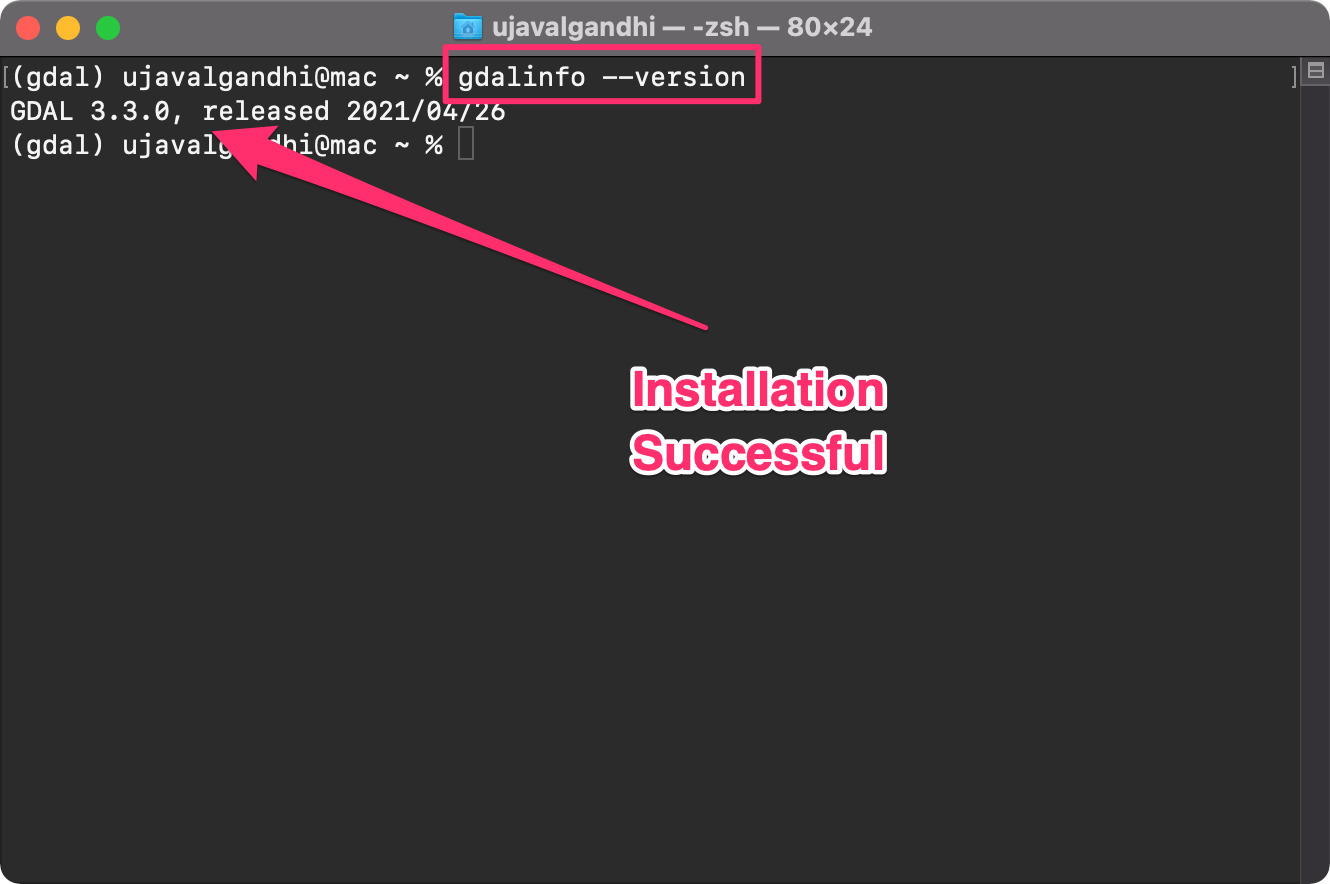 

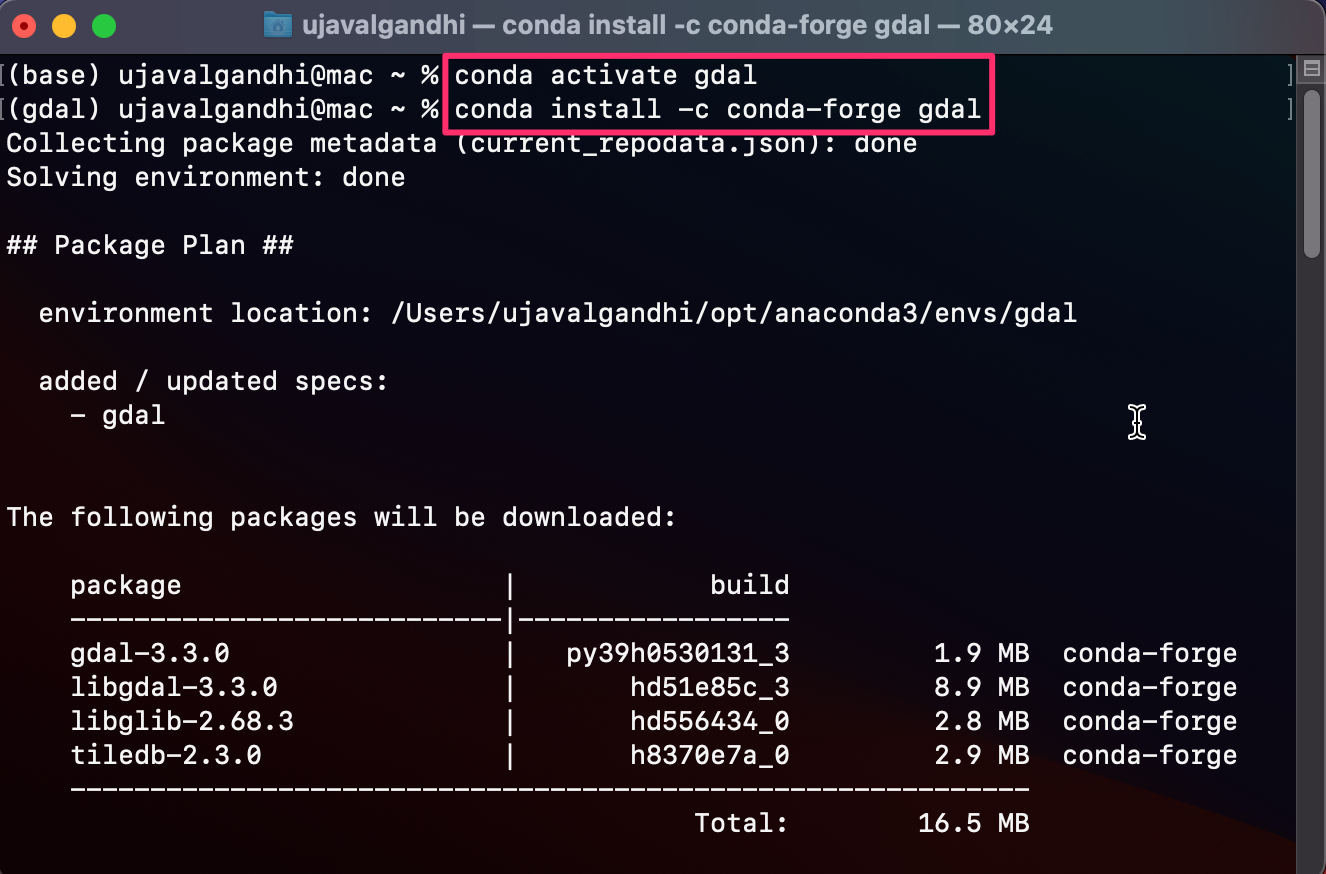
  - If nothing works, use colab

Examples : 

In [1]:
!gdalinfo --version

GDAL 3.8.5, released 2024/04/02


### 1 Data Preparation Process

### 1.1 Introduction to Spectral Bands
Explain the importance of different spectral bands in distinguishing various land cover types:

B2 (Blue): Useful for water body analysis.
B3 (Green): Indicates vegetation health.
B4 (Red): Helps in differentiating vegetation.
B8 (NIR - Near Infrared): Key for vegetation analysis.

### 1.2. True Color Image (RGB)

In Sentinel-2 imagery, the RGB bands are essential for visualizing land cover:

- **B2 (Blue, 490 nm)** 
- **B3 (Green, 560 nm)** 
- **B4 (Red, 665 nm)**

These bands create a True Color image similar to what the human eye sees.

In [ ]:
#Urban RGB image
!gdal_merge.py -separate -o urban_true_color.tif -co PHOTOMETRIC=RGB urban_B4.tif urban_B3.tif urban_B2.tif

In [ ]:
#Agriculture RGB image
!gdal_merge.py -separate -o agriculture_true_color.tif -co PHOTOMETRIC=RGB agriculture_B4.tif agriculture_B3.tif agriculture_B2.tif

In [ ]:
#Water RGB image
!gdal_merge.py -separate -o water_body_true_color.tif -co PHOTOMETRIC=RGB water_body_B4.tif water_body_B3.tif water_body_B2.tif

In [ ]:
#Desert RGB image
!gdal_merge.py -separate -o desert_true_color.tif -co PHOTOMETRIC=RGB desert_B4.tif desert_B3.tif desert_B2.tif

### 1.3 NDVI (Normalized Difference Vegetation Index)

NDVI is calculated as:
NDVI = (NIR - Red)/(NIR + Red)


- **NIR (Near Infrared):** Reflectance in the near-infrared band.
- **Red:** Reflectance in the red band.

**Minimum Value:** -1
- This occurs when NIR is much less than Red (e.g., highly unhealthy vegetation or water bodies).

**Maximum Value:** +1
- This occurs when NIR is much greater than Red (e.g., very healthy and dense vegetation).




In [ ]:
# Agriculture
!gdal_calc.py -A agriculture_B8.tif -B agriculture_B4.tif --outfile=agriculture_ndvi.tif --calc="(A-B)/(A+B)" --NoDataValue=0 --type='Float32'

In [ ]:
# Urban
!gdal_calc.py -A urban_B8.tif -B urban_B4.tif --outfile=urban_ndvi.tif --calc="(A-B)/(A+B)" --NoDataValue=0 --type='Float32'

In [ ]:
# Water Body
!gdal_calc.py -A water_body_B8.tif -B water_body_B4.tif --outfile=water_body_ndvi.tif --calc="(A-B)/(A+B)" --NoDataValue=0 --type='Float32'

In [ ]:
# Desert
!gdal_calc.py -A desert_B8.tif -B desert_B4.tif --outfile=desert_ndvi.tif --calc="(A-B)/(A+B)" --NoDataValue=0 --type='Float32'

### 1.4 NDWI (Normalized Difference Water Index)

NDWI is calculated as:

NDWI = (Green - NIR)/(Green - NIR)


- **Green:** Reflectance in the green band.
- **NIR (Near Infrared):** Reflectance in the near-infrared band.

**Minimum Value:** -1
- This occurs when Green is much less than NIR (e.g., very dry areas or built-up areas).

**Maximum Value:** +1
- This occurs when Green is much greater than NIR (e.g., open water bodies).


In [ ]:
#Waterbody
!gdal_calc.py -A water_body_B3.tif -B water_body_B8.tif --outfile=water_body_ndwi.tif --calc="(A-B)/(A+B)" --NoDataValue=0 --type='Float32'

In [ ]:
#Agriculture
!gdal_calc.py -A agriculture_B3.tif -B agriculture_B8.tif --outfile=agriculture_ndwi.tif --calc="(A-B)/(A+B)" --NoDataValue=0 --type='Float32'

In [ ]:
# Urban
!gdal_calc.py -A urban_B3.tif -B urban_B8.tif --outfile=urban_ndwi.tif --calc="(A-B)/(A+B)" --NoDataValue=0 --type='Float32'

In [ ]:
#Desert
!gdal_calc.py -A desert_B3.tif -B desert_B8.tif --outfile=desert_ndwi.tif --calc="(A-B)/(A+B)" --NoDataValue=0 --type='Float32'

### 2 Basic Raster Processing

1.Conversion between raster formats

This command converts a PNG image (input.tif) to a GeoTIFF (output.png). You can replace input.png with any supported raster format and output.tif with the desired output filename and format.


In [5]:
!gdal_translate -of GTiff input.tif output.png            

Input file size is 113, 88
0...10...20...30...40...50...60...70...80...90...100 - done.


2. Reprojection of raster data:
This command reprojects a raster file (input.tif) to the WGS84 coordinate system (EPSG:4326) and saves the result as output_reprojected.tif. You can change the target coordinate system (-t_srs) as needed.

In [7]:
!gdalwarp -t_srs EPSG:4326 input.tif output_reprojected.tif  #utm EPSG:32636

Creating output file that is 117P x 83L.
Processing /Users/m.kalathingal/Desktop/output.png [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


3. Resampling and resizing:
This command resamples a raster image (input.tif) to a target size of 500x500 pixels (-ts 500 500) and saves the result as output_resampled.tif. You can adjust the target size as needed.

In [6]:
!gdalwarp -ts 500 500 input.tif output_resampled.tif


Creating output file that is 500P x 500L.
Processing /Users/m.kalathingal/Desktop/output.png [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


4. Clipping raster data:
This command clips a raster dataset (input.tif) using a vector polygon layer (clipper.shp) and saves the clipped output as output_clipped.tif. The -crop_to_cutline flag ensures that the output raster aligns with the boundary of the clipping polygon.


In [ ]:
!gdalwarp -cutline clipper.shp -crop_to_cutline input.tif output_clipped.tif


5. Calculating raster statistics:

This command displays statistics (minimum, maximum, mean, standard deviation, etc.) for pixel values in a raster dataset (input.tif). It provides valuable information about the distribution and range of values within the raster.

In [ ]:
!gdalinfo -stats input.tif


6. Band calculations:
This command will create a new raster file (classified_ndvi.tif) where the NDVI values have been classified into the four categories as specified.

In [ ]:
!gdal_calc.py -A input_ndvi.tif --outfile=classified_ndvi.tif --calc="1*(A>=0)*(A<=0.25) + 2*(A>0.25)*(A<=0.5) + 3*(A>0.5)*(A<=0.75) + 4*(A>0.75)" --NoDataValue=0 --overwrite


7. Image processing:
This command linearly scales pixel values in input.tif from the range 0-1000 to the range 0-255 and saves the result as output_processed.tif.

In [ ]:
!gdal_translate -scale 0 1000 0 255 input.tif output_processed.tif

8. Merging raster datasets:
This command merges multiple raster datasets (input1.tif, input2.tif, input3.tif) into a single file named merged.tif.

In [ ]:

!gdal_merge.py -o merged.tif input1.tif input2.tif input3.tif

9. Setting NoData values:
This command sets the NoData value of input.tif to 0 and saves the result as output_nodata.tif.

In [ ]:
!gdal_translate -a_nodata 0 input.tif output_nodata.tif

10. Creating color relief:
This command creates a color-relief representation of elevation data (elevation.tif) using a predefined color ramp (color_ramp.txt) and saves the result as color_relief.tif.

In [9]:
%%bash
cat << EOF > colormap.txt
1000,101,146,82
1500,190,202,130
2000,241,225,145
2500,244,200,126
3000,197,147,117
4000,204,169,170
5000,251,238,253
6000,255,255,255
EOF

In [ ]:
!gdaldem color-relief elevation.tif color_ramp.txt color_relief.tif

11. Processing aerial imagery:
This command reprojects aerial imagery (input.tif) to the WGS84 coordinate system, applies cubic resampling (-r cubic), and sets nodata values to -9999 (-dstnodata -9999), saving the result as output_processed.tif.

In [ ]:
!gdalwarp -t_srs EPSG:4326 -r cubic -dstnodata -9999 input.tif output_processed.tif


12. Merging individual bands into RGB composite:

This command merges three individual bands (band1.tif, band2.tif, band3.tif) into an RGB composite image named rgb_composite.tif.

In [ ]:
!gdal_merge.py -separate -o rgb_composite.tif band1.tif band2.tif band3.tif


13. Apply histogram stretch and color correction:
This command applies histogram stretch to each band of input.tif, mapping the original pixel values to the range 0-255, and saves the result as output_stretched.tif.


In [ ]:
!gdal_translate -scale_1 0 255 -scale_2 0 255 -scale_3 0 255 input.tif output_stretched.tif

14. Raster algebra (Similar to band calculation but here, it is multiple inputs ):
This command performs raster algebra on two input raster datasets (input1.tif, input2.tif), adding their corresponding pixel values together, and saves the result as output_raster_algebra.tif.


In [ ]:
!gdal_calc.py -A input1.tif -B input2.tif --outfile=output_raster_algebra.tif --calc="A+B"


15. Pan sharpening:
This command performs pan sharpening on a multispectral image (multispectral.tif) using a panchromatic image (pan.tif) and saves the result as pan_sharpened.tif using bilinear resampling.

In [ ]:
!gdal_pansharpen.py -r bilinear -co COMPRESS=JPEG pan.tif multispectral.tif pan_sharpened.tif


16. Georeferencing:
This command georeferences input.tif to the WGS84 coordinate system (EPSG:4326) and sets the upper-left and lower-right coordinates (-a_ullr ulx uly lrx lry). The result is saved as output_georeferenced.tif.

In [ ]:
!gdal_translate -a_srs EPSG:4326 -a_ullr ulx uly lrx lry input.tif output_georeferenced.tif


17. Georeferencing with GCPs:   
Georeferencing using Ground Control Points (GCPs) in GDAL involves specifying the correspondence between points in the raster image and 
their corresponding geographic coordinates in the real world. This process allows GDAL to transform the image into a georeferenced format. 


In [ ]:
!gdal_translate -gcp pixel_column pixel_row easting northing -gcp pixel_column pixel_row easting northing ... input.tif output_georeferenced.tif


18. Image mosaicking with feathering:

This command creates a mosaic of multiple input images (input1.tif, input2.tif, input3.tif) using cubic resampling and saves the result as output_mosaic.tif

In [ ]:
!gdalwarp -r cubic input1.tif input2.tif input3.tif output_mosaic.tif


19. Image subsetting:
This command extracts a subset of input.tif starting from the pixel coordinates (100, 100) with a size of 500x500 pixels and saves it as output_subset.tif.



In [ ]:
!gdal_translate -srcwin 100 100 500 500 input.tif output_subset.tif

20. Image retiling:
This command retiles input.tif into smaller tiles of size 512x512 pixels and saves them in the tiles directory.


In [ ]:
!gdal_retile.py -ps 512 512 -targetDir tiles input.tif


21. Image band reordering:
This command reorders the bands of input.tif so that band 3 becomes the first band, band 2 becomes the second band, and band 1 becomes the third band in the output file output_reordered.tif.


!gdal_translate -b 3 -b 2 -b 1 input.tif output_reordered.tif

22.  Image smoothing with Gaussian filter:
This command applies a Gaussian smoothing filter to input.tif, removing noise and saving the result as output_smoothed.tif.


In [ ]:
!gdal_sieve.py -st 50 -4 input.tif output_smoothed.tif

23. Image classification:
This command classifies input.tif into vector polygons using the GDAL polygonize utility and saves the result as a shapefile (output.shp).

In [ ]:
!gdal_polygonize.py input.tif -f "ESRI Shapefile" output.shp


24. Image enhancement with gamma correction:
This command applies gamma correction with a gamma value of 0.8 to input.tif and saves the result as output_gamma.tif.

In [ ]:
!gdal_translate -scale 0 255 0 65535 -exponent 0.8 input.tif output_gamma.tif


25. Image thresholding:
This command performs thresholding on input.tif, setting pixel values greater than 100 to 1 and others to 0, and saves the result as output_thresholded.tif.

In [ ]:
!gdal_calc.py -A input.tif --outfile=output_thresholded.tif --calc="A>100" --NoDataValue=0
